In [1]:
import numpy as np
import pandas as pd

In [2]:
import random

In [3]:
L=[]
for i in range(10000):
    L.append(random.randint(1,6))

In [4]:
L[:5]

[2, 6, 1, 3, 5]

In [5]:
pd.Series(L).value_counts()

6    1710
3    1710
5    1673
1    1641
2    1637
4    1629
Name: count, dtype: int64

In [6]:
s=pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()

In [7]:
s=s.sort_index()

<Axes: >

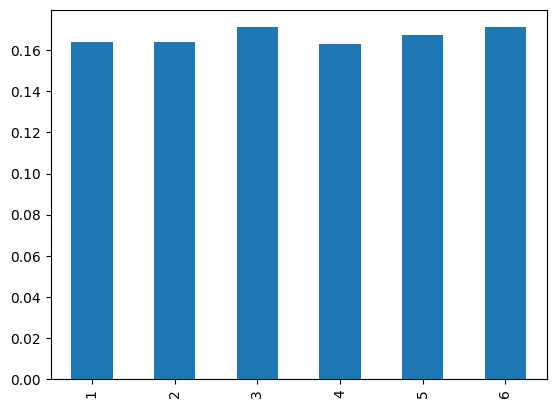

In [8]:
s.plot(kind='bar')

In [9]:
doubleDice=list()
for i in range(100000):
    x=random.randint(1,6)
    y=random.randint(1,6)
    doubleDice.append(x+y)

In [10]:
DD=pd.Series(doubleDice).value_counts().sort_index()

In [11]:
DD=DD/pd.Series(doubleDice).value_counts().sum()
DD

2     0.02809
3     0.05591
4     0.08369
5     0.11277
6     0.13851
7     0.16587
8     0.14069
9     0.11005
10    0.08222
11    0.05565
12    0.02655
Name: count, dtype: float64

<Axes: >

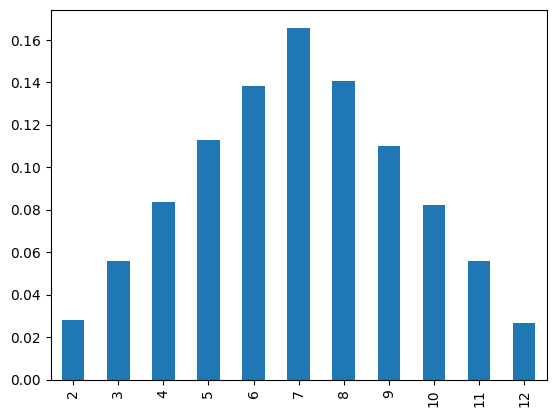

In [12]:
DD.plot(kind='bar')

In [13]:
b=np.cumsum(DD)


<Axes: >

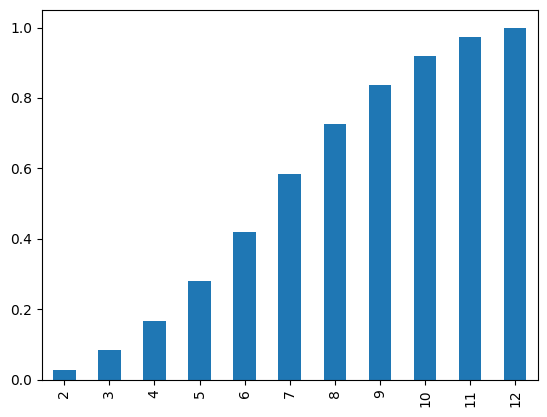

In [14]:
b.plot(kind='bar')

# Parametric Density Estimation

In [15]:
import matplotlib.pyplot as plt 
from numpy.random import normal

In [16]:
sample=normal(loc=50, scale=5,size=1000)

In [17]:
sample

array([55.59282757, 40.10485279, 49.12925629, 48.67284587, 58.18624054,
       46.00392136, 49.96202397, 45.55127912, 53.02652889, 42.03466487,
       45.30669536, 51.31367901, 50.78648256, 43.67126839, 45.23843979,
       55.70918463, 44.77365541, 48.96618335, 46.75706285, 53.38922703,
       43.27913231, 38.67025784, 43.60653616, 47.53578287, 61.11168599,
       44.01572493, 48.06068012, 42.42019468, 43.61456681, 51.05921082,
       49.84011701, 55.02939677, 45.41378716, 36.27615662, 38.70410515,
       52.95387896, 61.45908267, 44.16818531, 48.23260242, 53.38619054,
       43.29625429, 49.81177327, 45.17915486, 47.12369006, 54.57209099,
       51.85267041, 55.10914206, 55.68019306, 53.34104959, 48.17729082,
       50.74622697, 54.81095895, 53.49764742, 47.03537467, 43.67240468,
       56.05803299, 54.01837431, 46.62104395, 60.93212462, 53.18404443,
       62.05073214, 47.28341527, 54.14741329, 59.059237  , 51.94241417,
       54.75717999, 53.54893272, 54.59523664, 59.66345288, 47.96

In [18]:
sample.mean()

49.700863682446695

(array([  1.,   7.,  20.,  70., 159., 248., 244., 172.,  56.,  23.]),
 array([29.97998185, 33.29571716, 36.61145247, 39.92718778, 43.24292309,
        46.5586584 , 49.87439372, 53.19012903, 56.50586434, 59.82159965,
        63.13733496]),
 <BarContainer object of 10 artists>)

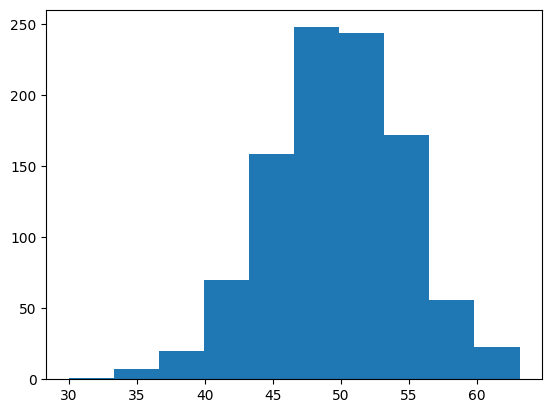

In [19]:
#plot histogram to understand the distribution of data
plt.hist(sample)

In [20]:
# calculating sample mean and std dev
sample_mean=sample.mean()
sample_std=sample.std()

In [21]:
#fit the distribution with the above parameter
from scipy.stats import norm
dist=norm(sample_mean,sample_std)

In [22]:
values=np.linspace(sample.min(),sample.max(),100)


In [23]:
probabilities=[dist.pdf(value) for value in values]

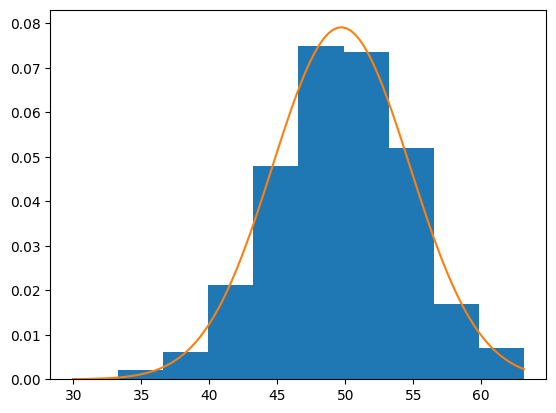

In [24]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\shafe\AppData\Local\Temp\ipykernel_9040\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

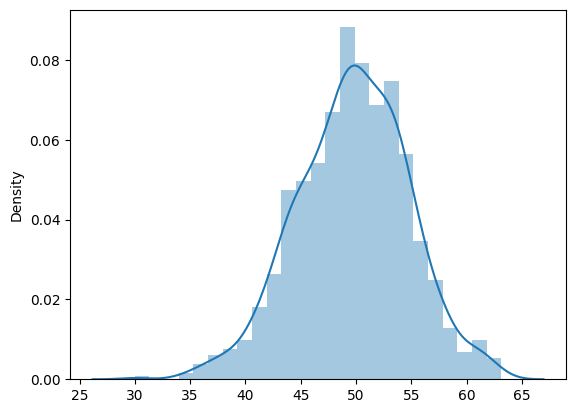

In [25]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [26]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [27]:
sample

array([21.70882615, 18.79075428, 25.78428878, 21.16256622, 19.25333352,
        8.21081846, 14.61456277, 18.00209565, 20.62618135, 21.37883709,
       18.66624877, 25.57587999, 15.40026326, 18.34823256, 27.77286264,
       24.34278446, 26.04223388, 20.75012251, 18.50066477, 14.54045816,
       22.57304848, 12.81180005, 20.59818285, 25.58771861, 26.93110822,
       22.12663121, 19.81555495, 12.1452161 , 22.37364507, 23.49577446,
       13.77587893, 16.43966134, 11.5252079 , 10.64926663, 18.2934922 ,
       22.7349747 , 21.69277744, 22.25822598, 18.76565597, 10.06174253,
       29.27256817, 22.93722528, 20.59884603, 20.32604484, 25.72620133,
       24.32866297, 26.86760707, 23.45944126, 26.69053128, 24.17020069,
       25.65439923, 25.27296155, 15.77933139, 18.75644487, 27.31846994,
       15.76472614, 18.27617528, 25.24589353, 16.41728721, 16.71684906,
       23.41936437, 31.06459578, 24.70639042, 22.90395423, 26.50652719,
       15.59990577, 20.5539412 , 22.64944287, 22.6788396 , 25.45

(array([ 1.,  4.,  0.,  5.,  7., 15.,  5., 11., 22., 12., 21., 37., 14.,
        15., 21., 29., 22., 18., 20., 14.,  3.,  6.,  6., 16., 23., 22.,
        42., 44., 43., 45., 62., 59., 59., 57., 46., 42., 31., 35., 22.,
        17., 11.,  6.,  4.,  2.,  1.,  0.,  1.,  0.,  1.,  1.]),
 array([ 6.89937113,  7.93440543,  8.96943974, 10.00447404, 11.03950835,
        12.07454266, 13.10957696, 14.14461127, 15.17964557, 16.21467988,
        17.24971418, 18.28474849, 19.31978279, 20.3548171 , 21.38985141,
        22.42488571, 23.45992002, 24.49495432, 25.52998863, 26.56502293,
        27.60005724, 28.63509155, 29.67012585, 30.70516016, 31.74019446,
        32.77522877, 33.81026307, 34.84529738, 35.88033168, 36.91536599,
        37.9504003 , 38.9854346 , 40.02046891, 41.05550321, 42.09053752,
        43.12557182, 44.16060613, 45.19564043, 46.23067474, 47.26570905,
        48.30074335, 49.33577766, 50.37081196, 51.40584627, 52.44088057,
        53.47591488, 54.51094918, 55.54598349, 56.5810178 ,

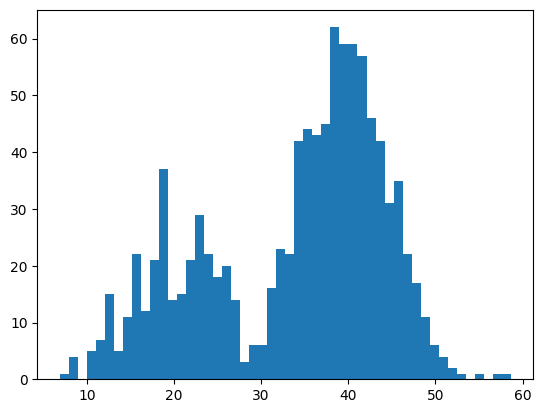

In [28]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [29]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [30]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [31]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

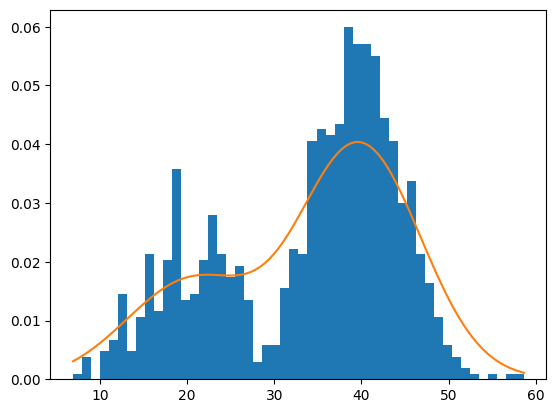

In [32]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

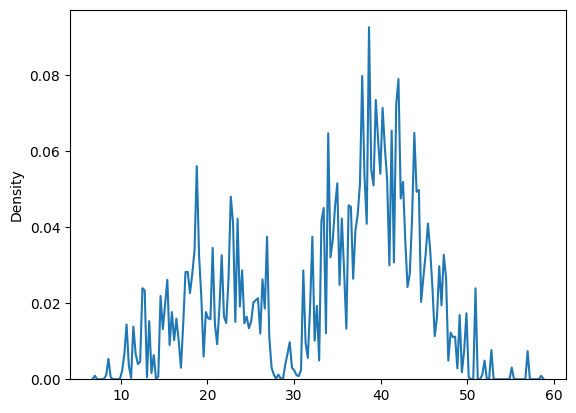

In [33]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [34]:
import seaborn as sns

In [35]:
df = sns.load_dataset('iris')

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

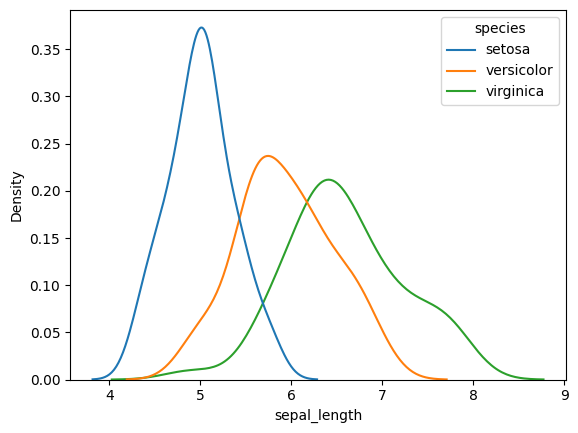

In [37]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

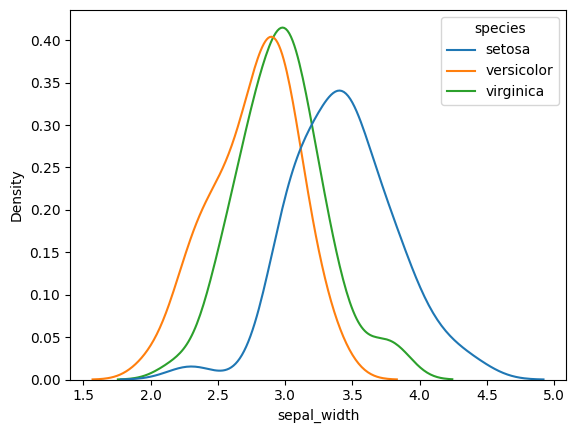

In [38]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

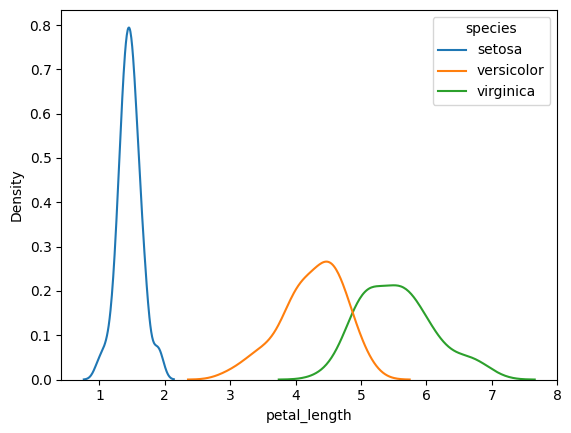

In [39]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

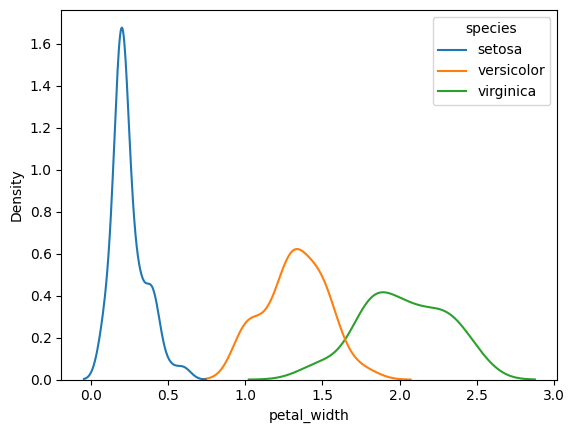

In [40]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

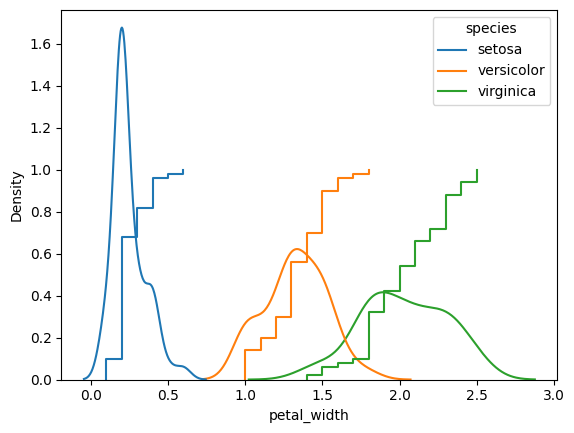

In [43]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [44]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

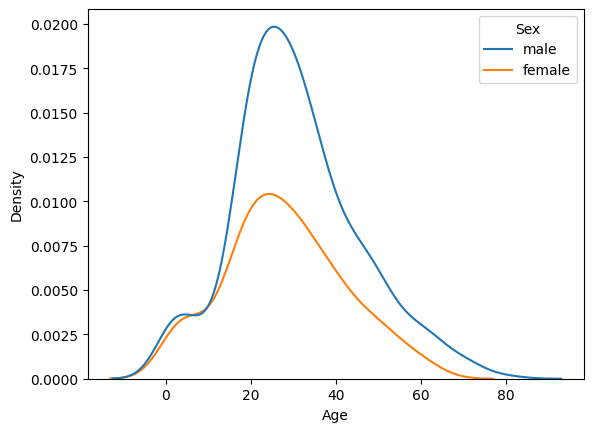

In [46]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

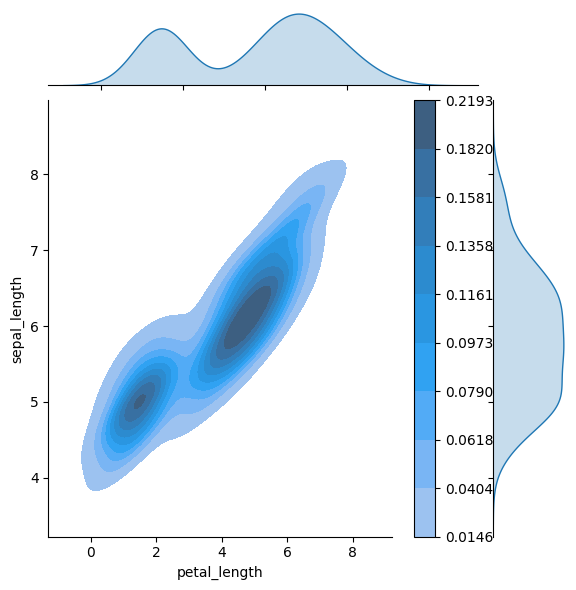

In [47]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

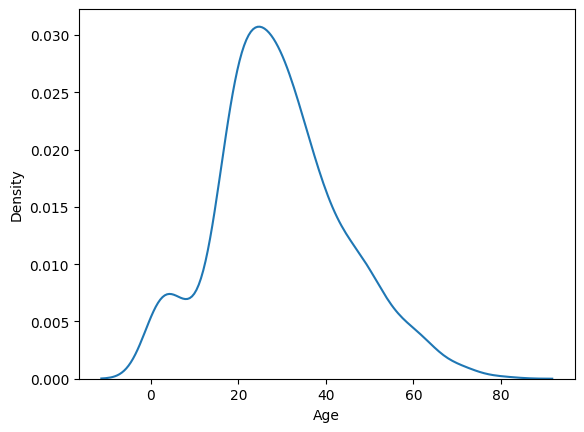

In [48]:
sns.kdeplot(titanic['Age'])

In [49]:
titanic['Age'].mean()

29.69911764705882

In [50]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

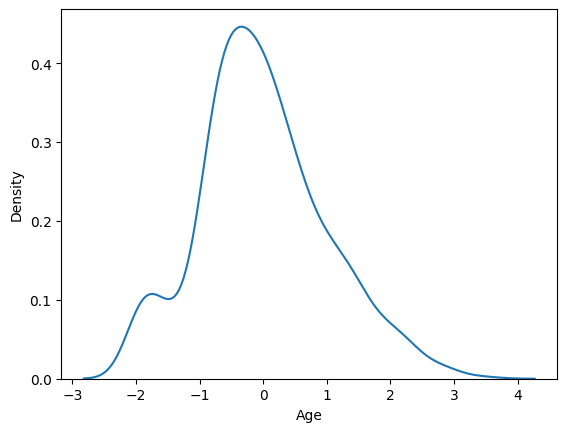

In [51]:
sns.kdeplot(x)

In [52]:
x.mean()

2.338621049070358e-16

In [53]:
x.std()

1.0

In [54]:
titanic['Age'].skew()

0.38910778230082704

In [55]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [56]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [57]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [58]:
titanic['Age'].max()

80.0